# 1. Importieren der benötigten Bibliotheken



In [295]:
import os
import subprocess
import pandas as pd
import shutil
import tqdm
import glob
import pytest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import shapiro
import seaborn as sns
from scipy.stats import shapiro, binom_test, kstest, uniform
import numpy as np
import pandas as pd
import shutil
import numpy as np
import os
import random

import os
import pandas as pd

# Überprüfen Sie das aktuelle Arbeitsverzeichnis
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

# Überprüfen Sie, ob die Datei existiert
file_path = '../source_csv/list_attr_celeba.csv'
if os.path.isfile(file_path):
    print("Die Datei existiert.")
    df = pd.read_csv(file_path)
else:
    print("Die Datei existiert nicht.")

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1



# 2. Datenpreparation für das ML-Modell


## 2.1 Extrahieren der Bildpfade aus dem Ordner img_align_celeba 
##### Dies wird gemacht um die Pfade aus der Source-CSV: list_attr_celeba.csv in der Spalte image_id mit den richtigen Pfaden zu ersetzen. Somit sind die Pfade den Bildern richtig zugeordnet. 

# 2.1  Festlegung der benötigten Pfade

In [329]:
source_csv = "../source_csv/list_attr_celeba.csv"
csv_path="data/source_csv/list_attr_celeba.csv"
source_train_path = "data/train-test-data/"
men_image_source_path_train = "data/train-test-data/train/men"
women_image_source_path_train = "data/train-test-data/train/women"
men_image_source_path_test = "data/train-test-data/test/men"
women_image_source_path_test = "data/train-test-data/test/women"
merged_csv_test = "model/csv_sheets/merged_df_test.csv"
merged_csv_train = "model/csv_sheets/merged_df_train.csv"
required_directories = [source_train_path, women_image_source_path_test,men_image_source_path_test,men_image_source_path_train,women_image_source_path_train]
# Hauptpfad zu den Bildern
base_path = "data/img_align_celeba"
IDs = "data/IDs"
id_column = 'image_id'
image_folder = "data/img_align_celeba"
total_images = 10
male_csv = "data/IDs/male_ids.csv"
female_csv = "data/IDs/female_ids.csv"
os.makedirs(men_image_source_path_train, exist_ok=True)
os.makedirs(women_image_source_path_train, exist_ok=True)
os.makedirs(women_image_source_path_test,exist_ok=True)
os.makedirs(men_image_source_path_test,exist_ok=True)
os.makedirs(IDs,exist_ok=True)


Aktuelles Arbeitsverzeichnis: c:\Users\busse\Bachelorarbeit\CICD-Pipeline-Gender-Recognition\data\dataprep_scripts
Die Datei existiert.


# 2.1 Extraktion und Speicherung der Dateinamen aus dem Bilddaten Quellordner in eine CSV-Datei

In [297]:
def save_filenames_to_csv(csv_path, csv_name=f"data/IDs/data-ids.csv", id_column="image_id"):
    df = pd.read_csv(csv_path)
    df = df[[id_column]]
    df.to_csv(csv_name, index=False)
    
save_filenames_to_csv(csv_path=csv_path)


# 2.2 Extraktion der IDs aus der Quell-CSV

In [298]:
def extract_all_ids(csv_path, column="Male", id_column="image_id"):
    df = pd.read_csv(csv_path)
    df[column] = df[column].replace(-1, 0)
    df.to_csv(f'data/IDs/source_csv_all_ids.csv', columns=[id_column], index=False)
    
extract_all_ids(csv_path=csv_path)

# 2.3 Überprüfung auf Vollständigkeit der Bilddaten durch den Vergleich der Dateinamen aus img_align_celeba und der IDs aus der Quell-CSV 

In [299]:
def compare_columns(csv1, csv2):
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)
    column1 = df1.iloc[:, 0]
    column2 = df2.iloc[:, 0]
    is_equal = column1.equals(column2)
    return is_equal

if compare_columns(f'data/IDs/source_csv_all_ids.csv', f'data/IDs/data-ids.csv') == True: 
    print("::warning:: Daten sind vollständig! Die Bilddaten-IDs stimmen mit den IDs aus Attributliste überein! ")
else: 
    print("::warning:: Daten sind unvollständig! Die Bilddaten-IDs stimmen nicht mit den IDs aus der Attributliste überein! ")


::warning:: Daten sind vollständig! Die Bilddaten-IDs stimmen mit den IDs aus Attributliste überein! 


# 2.3 Extraktion der IDs aus der Quell-CSV in Abhängigkeit der Spalte "Male"

In [300]:
def extract_ids(csv_path, column="Male", id_column="image_id"):
    df = pd.read_csv(csv_path)
    df[column] = df[column].replace(-1, 0)
    male_df = df[df[column] == 1]
    female_df = df[df[column] == 0]
    male_df.to_csv(f'data/IDs/male_ids.csv', columns=[id_column], index=False)
    female_df.to_csv(f'data/IDs/female_ids.csv', columns=[id_column], index=False)
    
extract_ids(csv_path=csv_path)

## Löschung von Bilddaten, falls Trainings- und Testordner bereits befüllt sind

In [301]:

def clear_directory(dir_path):
    for filename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

clear_directory(men_image_source_path_train)
clear_directory(women_image_source_path_train)
clear_directory(women_image_source_path_test)
clear_directory(men_image_source_path_test)

# 2.3 Verteilung der (neuen) Bilddaten in Trainings- und Testordner

In [302]:
def get_ids_from_csv(csv_file, id_column):
    df = pd.read_csv(csv_file)
    ids = df[id_column].tolist()
    return ids



def split_data_random(image_folder, male_csv, female_csv, total_images, id_column, train_ratio=0.7):
    print(total_images)
    male_ids = get_ids_from_csv(male_csv, id_column)
    female_ids = get_ids_from_csv(female_csv, id_column)
    
   
    num_train = int(total_images * train_ratio)
    num_test = int(total_images - num_train)

    test_ids_male = random.sample(male_ids, num_test // 2)
    test_ids_female = random.sample(female_ids, num_test // 2)
    test_ids = test_ids_male + test_ids_female
   
    train_ids_male = set(male_ids) - set(test_ids) 
    train_ids_female = set(female_ids) - set(test_ids)
    male_ids = sorted(train_ids_male)
    female_ids = sorted(train_ids_female)
    female_ids = random.sample(female_ids,num_train//2)
    male_ids = random.sample(male_ids,num_train//2)
    
    for id in test_ids_male:
        shutil.copy(os.path.join(image_folder, id), men_image_source_path_test)
    
    for id in test_ids_female:
        shutil.copy(os.path.join(image_folder, id), women_image_source_path_test)

    for id in male_ids:
        shutil.copy(os.path.join(image_folder, id), men_image_source_path_train)
    
    for id in female_ids:
        shutil.copy(os.path.join(image_folder, id), women_image_source_path_train)

split_data_random(image_folder, male_csv,female_csv,total_images, id_column)

10


In [303]:


# Erstellen der source.csv um automatisch die benötigten Spalten für die Visualisierung der Daten herauszuziehen.
df = pd.read_csv(csv_path)
df.to_csv("data/column_source_csv/source.csv", index=False)

# Extrahiert aus dem Source Pfad die Bildpfade
def get_image_paths(source_path):
    image_formats = ['*.jpg', '*.png', '*.gif', '*.jpeg']
    image_paths = []
    for format in image_formats:
        image_paths.extend(glob.glob(os.path.join(source_path, format)))
    return image_paths

# Testet ob die Bilder in der CSV-Datei die richtigen Dateiendungen haben
def test_image_extensions_in_csv(csv_path, column_name_of_image_paths="image_id"):
    df = pd.read_csv(csv_path)

    # Überprüfe, ob alle Werte in der Spalte 'image_id' auf Bilddateien verweisen
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    df['valid_extension'] = df[column_name_of_image_paths].apply(lambda x: os.path.splitext(x)[1].lower() in valid_extensions)

    # Drucke die Zeilennummern mit ungültiger Dateierweiterung, wenn es welche gibt
    invalid_rows = df[~df['valid_extension']].index
    if len(invalid_rows) > 0:
        print(f'Ungültige Dateierweiterungen gefunden in den Zeilen: {invalid_rows.tolist()}')

    assert all(df['valid_extension']), f'Nicht alle Werte in der Spalte {column_name_of_image_paths} verweisen auf Bilddateien./n {invalid_rows} /n Überprüfe die Dateierweiterungen.'

# Extrahieren der Bildpfade auf img_align_celeba
image_paths_array = get_image_paths(base_path)

# # Erstellen eines Dataframes mit der Source CSV 
# df = pd.read_csv("data/source_csv/list_attr_celeba.csv")
# df['image_id'] = df['image_id'].str.replace("C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/", "")
# df.to_csv("data/source_csv/list_attr_celeba.csv", index=False)

## 2.2 Testen ob die Bildpfade in der CSV-Datei die richtige Dateiendung haben. 

In [304]:
test_image_extensions_in_csv(csv_path=csv_path, column_name_of_image_paths="image_id")

## 2.3 Überprüfen ob die source.csv im Dateiformat CSV ist. 


In [305]:
def check_csv_extension(csv_path):
    _, ext = os.path.splitext(csv_path)
    assert ext.lower() == '.csv', f'Die Datei {csv_path} hat keine .csv Erweiterung'
    
check_csv_extension(csv_path)

## 2.4 Überprüfen ob die benötigten Ordner vorhanden sind zum trainieren, testen, speichern der ML-Modelle

In [306]:
def check_required_directories_data_exists(directories):
    for directory in directories:
        assert os.path.isdir(directory), f'Das Verzeichnis {directory} existiert nicht'

check_required_directories_data_exists(required_directories)

# 3 Datenqualität testen

## 3.1 Überprüfen ob Bilddateien fehlen, Duplicate vorhanden sind, Überprüfen ob die Bildpfade gültig sind in der CSV. 

In [307]:
def test_quality_of_csv(csv_path,column_name_of_image_paths="image_id"):
    df = pd.read_csv(csv_path)

    # Überprüfe auf fehlende Werte
    assert df[column_name_of_image_paths].isnull().sum() == 0, f'Es gibt fehlende Werte in der Spalte {column_name_of_image_paths}'

    # Überprüfe auf Duplikate
    assert df.duplicated().sum() == 0, "Es gibt Duplikate in der Daten"
    
    # # Überprüfe, ob alle Werte in der Spalte 'image_id' gültige Bildpfade sind
    # assert all(df[column_name_of_image_paths].apply(os.path.isfile)), f'Nicht alle Werte in der Spalte {column_name_of_image_paths} sind gültige Bildpfade./n {df[column_name_of_image_paths].sample(10)} /n Überprüfe, ob der Pfad vorhanden ist.' 

test_quality_of_csv(csv_path=csv_path, column_name_of_image_paths=df.columns[0])

## 3.2 Überprüfen ob es in allen Spalten Werte gibt die null bzw. leer sind.

In [321]:
def check_missing_values(csv_path):
    df = pd.read_csv(csv_path)
    missing_values = df.isnull().any()
    
    return missing_values

check_missing_values(csv_path=csv_path)

image_id               False
5_o_Clock_Shadow       False
Arched_Eyebrows        False
Attractive             False
Bags_Under_Eyes        False
Bald                   False
Bangs                  False
Big_Lips               False
Big_Nose               False
Black_Hair             False
Blond_Hair             False
Blurry                 False
Brown_Hair             False
Bushy_Eyebrows         False
Chubby                 False
Double_Chin            False
Eyeglasses             False
Goatee                 False
Gray_Hair              False
Heavy_Makeup           False
High_Cheekbones        False
Male                   False
Mouth_Slightly_Open    False
Mustache               False
Narrow_Eyes            False
No_Beard               False
Oval_Face              False
Pale_Skin              False
Pointy_Nose            False
Receding_Hairline      False
Rosy_Cheeks            False
Sideburns              False
Smiling                False
Straight_Hair          False
Wavy_Hair     

## 3.3 Überprüfen ob es Anomalien, Ausreißer gibt

In [309]:
def test_outliers_all_columns(csv_path):
    df = pd.read_csv(csv_path)
    for column_name in df.columns:
        if np.issubdtype(df[column_name].dtype, np.number):  # Überprüfe, ob die Spalte numerisch ist
            z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
            if any(z_scores > 3):
                print(f"::warning::Es gibt Ausreißer in der Spalte '{column_name}'")

test_outliers_all_columns(csv_path=csv_path)

::warning::Es gibt Ausreißer in der Spalte 'Bald'
::warning::Es gibt Ausreißer in der Spalte 'Blurry'
::warning::Es gibt Ausreißer in der Spalte 'Chubby'
::warning::Es gibt Ausreißer in der Spalte 'Double_Chin'
::warning::Es gibt Ausreißer in der Spalte 'Eyeglasses'
::warning::Es gibt Ausreißer in der Spalte 'Goatee'
::warning::Es gibt Ausreißer in der Spalte 'Gray_Hair'
::warning::Es gibt Ausreißer in der Spalte 'Mustache'
::warning::Es gibt Ausreißer in der Spalte 'Pale_Skin'
::warning::Es gibt Ausreißer in der Spalte 'Receding_Hairline'
::warning::Es gibt Ausreißer in der Spalte 'Rosy_Cheeks'
::warning::Es gibt Ausreißer in der Spalte 'Sideburns'
::warning::Es gibt Ausreißer in der Spalte 'Wearing_Hat'
::warning::Es gibt Ausreißer in der Spalte 'Wearing_Necktie'


## 3.4 Überprüfen ob die Daten ausgeglichen sind

Es gibt unausgeglichene Spalten:/nDie Spalte '5_o_Clock_Shadow' ist unausgeglichen. Anzahl von -1: 180083, Anzahl von 1: 22516/nDie Spalte 'Arched_Eyebrows' ist unausgeglichen. Anzahl von -1: 148509, Anzahl von 1: 54090/nDie Spalte 'Bags_Under_Eyes' ist unausgeglichen. Anzahl von -1: 161153, Anzahl von 1: 41446/nDie Spalte 'Bald' ist unausgeglichen. Anzahl von -1: 198052, Anzahl von 1: 4547/nDie Spalte 'Bangs' ist unausgeglichen. Anzahl von -1: 171890, Anzahl von 1: 30709/nDie Spalte 'Big_Lips' ist unausgeglichen. Anzahl von -1: 153814, Anzahl von 1: 48785/nDie Spalte 'Big_Nose' ist unausgeglichen. Anzahl von -1: 155083, Anzahl von 1: 47516/nDie Spalte 'Black_Hair' ist unausgeglichen. Anzahl von -1: 154127, Anzahl von 1: 48472/nDie Spalte 'Blond_Hair' ist unausgeglichen. Anzahl von -1: 172616, Anzahl von 1: 29983/nDie Spalte 'Blurry' ist unausgeglichen. Anzahl von -1: 192287, Anzahl von 1: 10312/nDie Spalte 'Brown_Hair' ist unausgeglichen. Anzahl von -1: 161027, Anzahl von 1: 41572/nDi

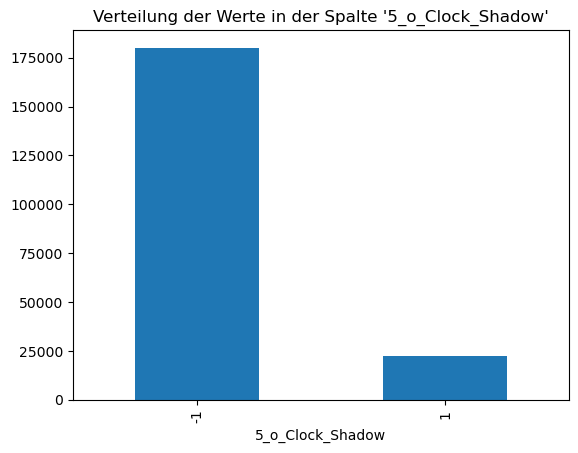

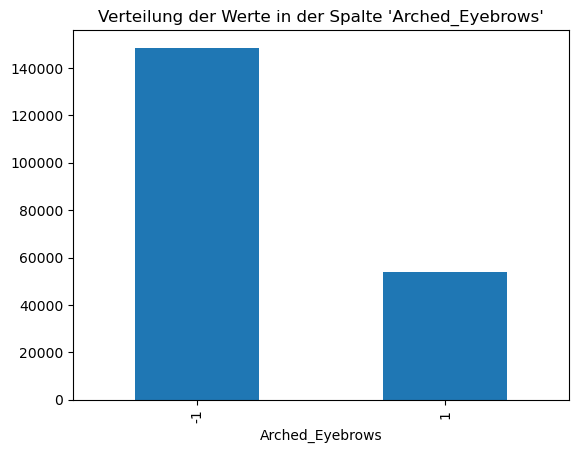

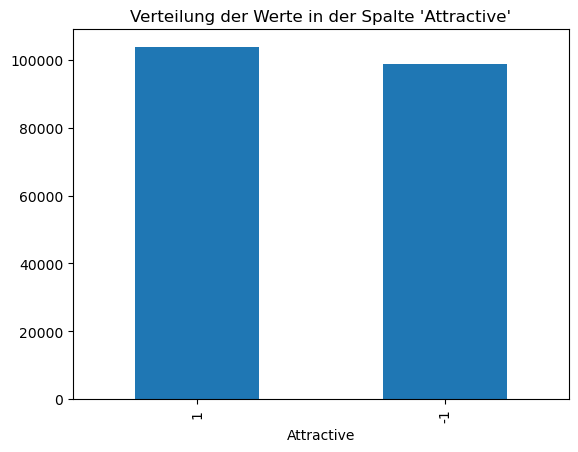

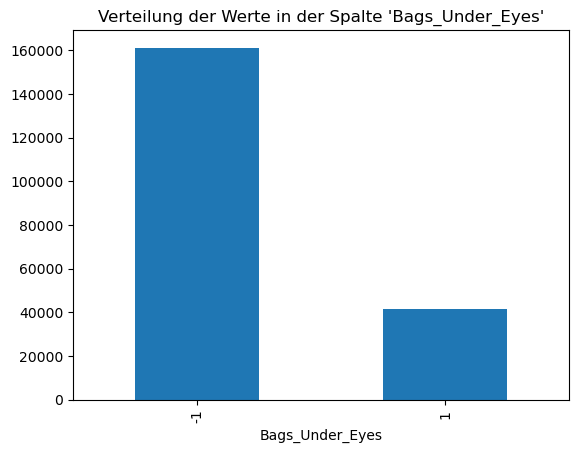

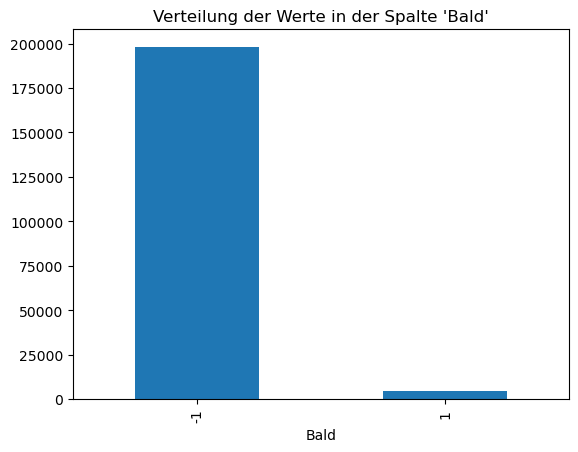

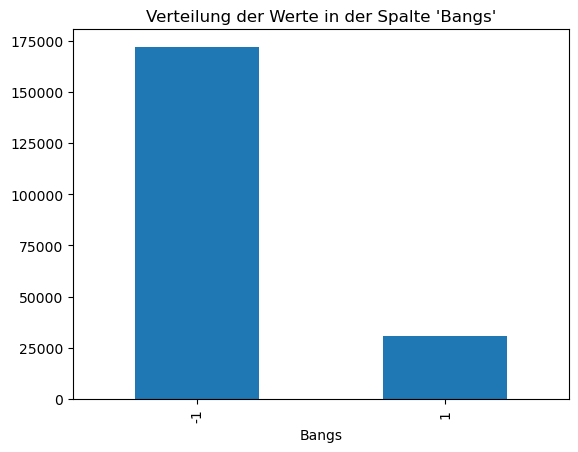

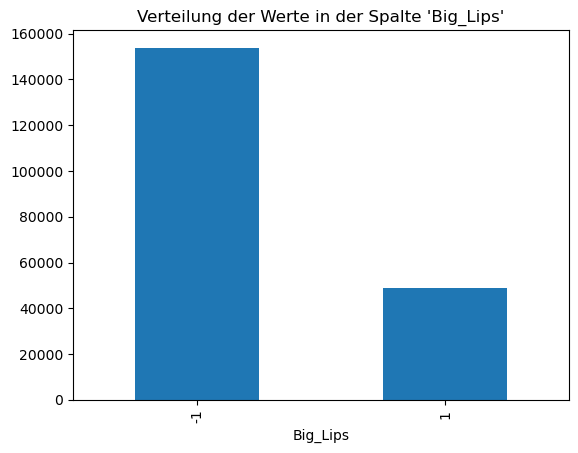

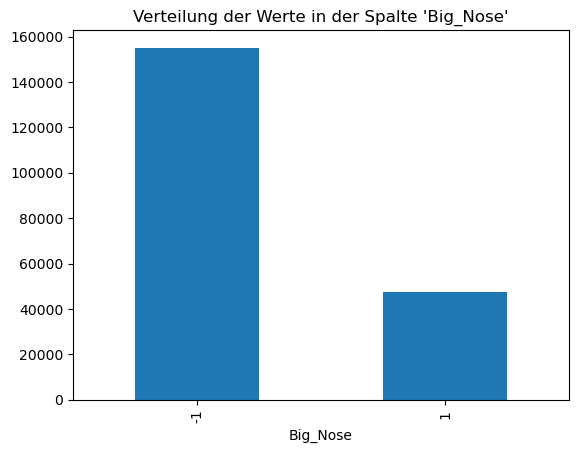

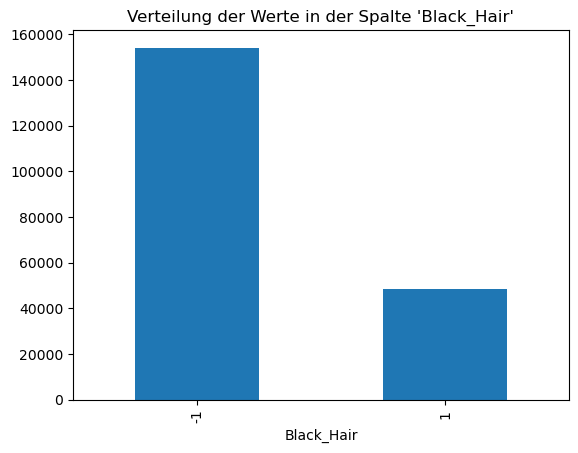

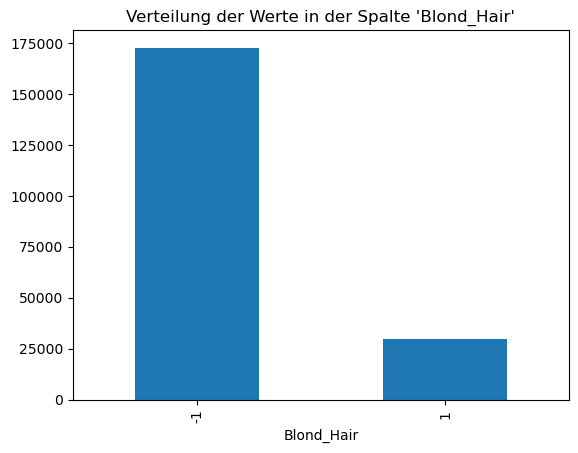

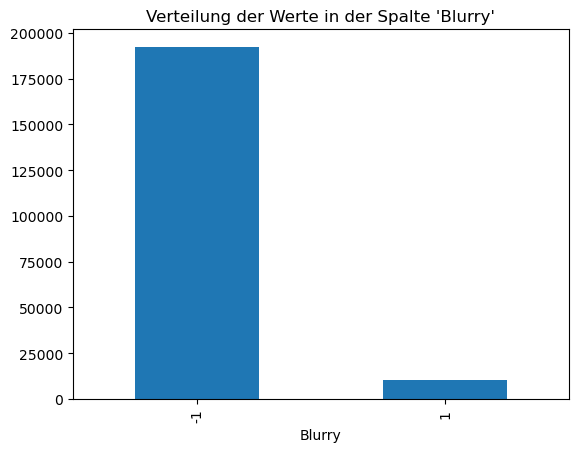

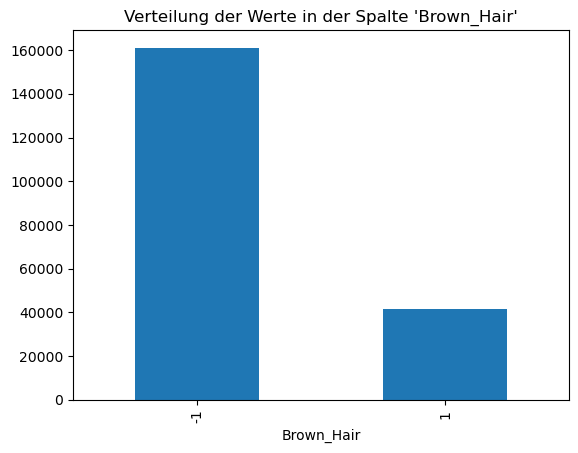

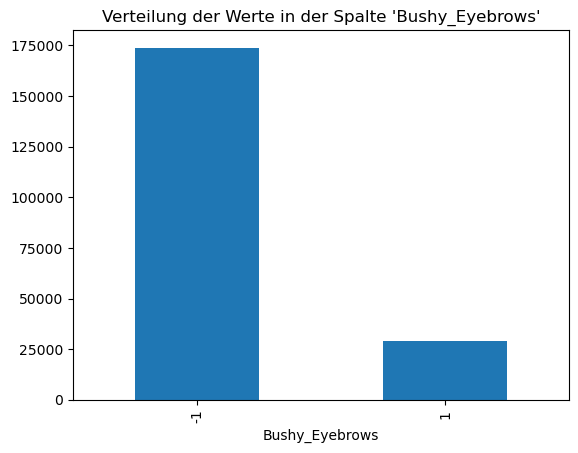

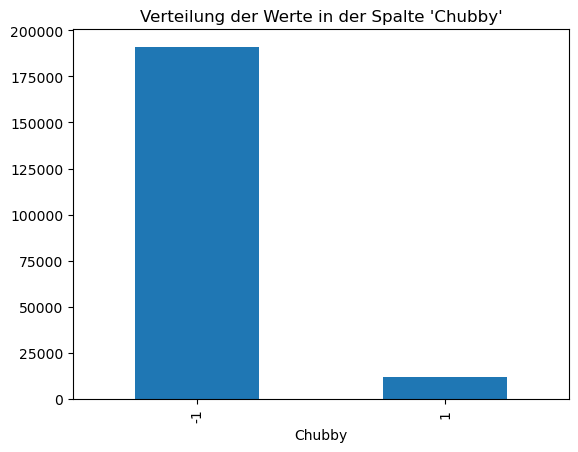

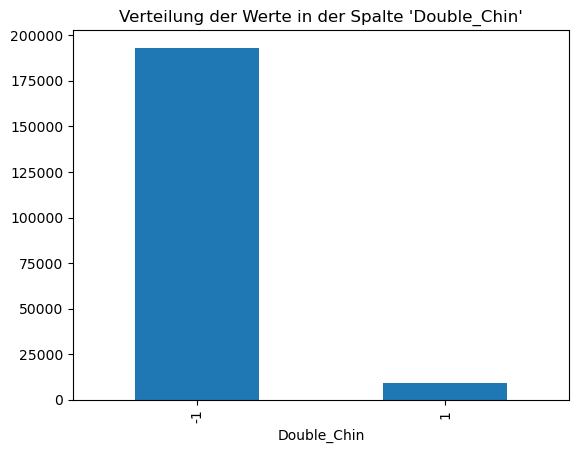

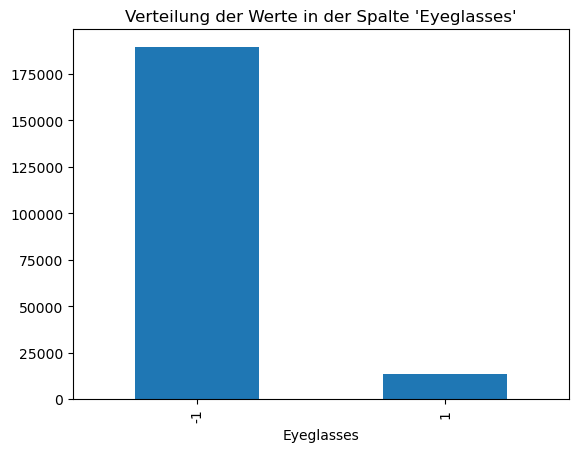

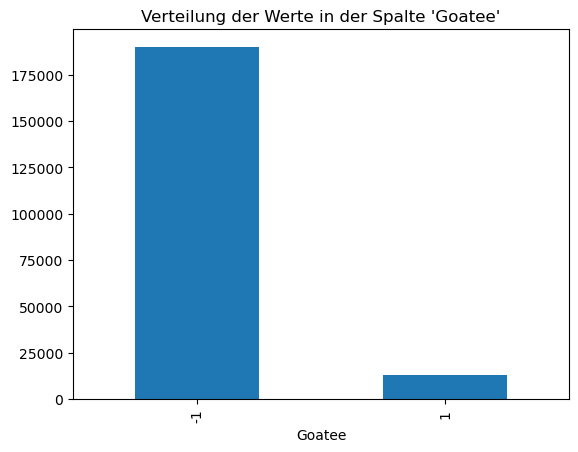

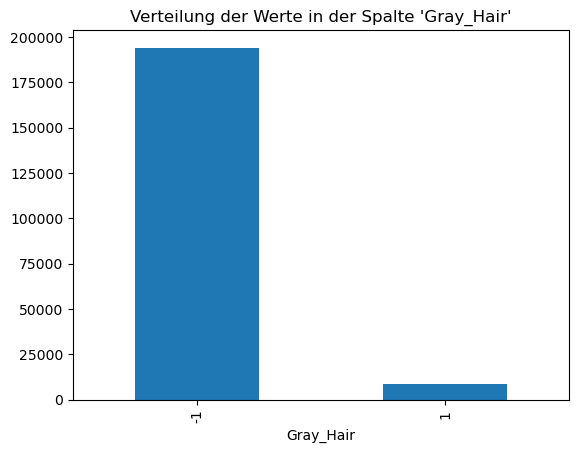

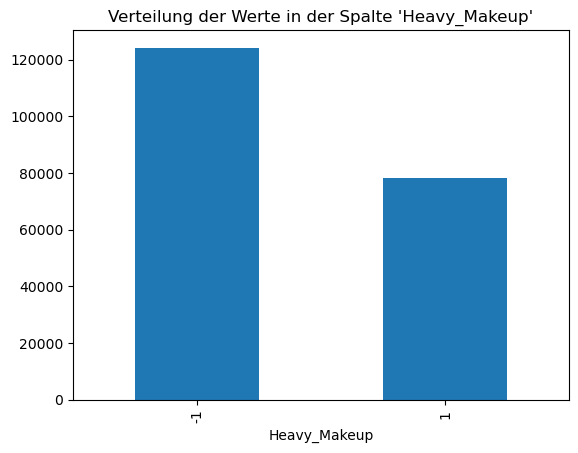

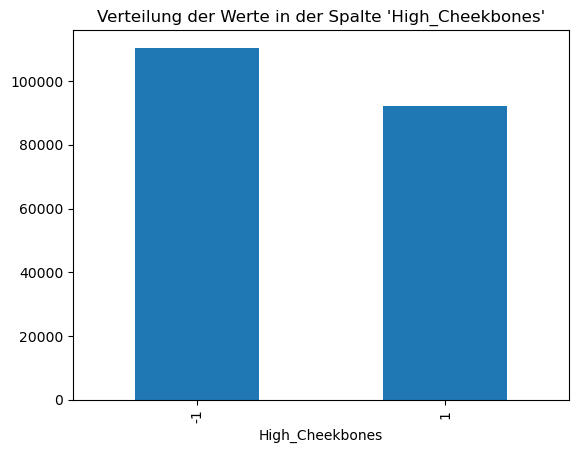

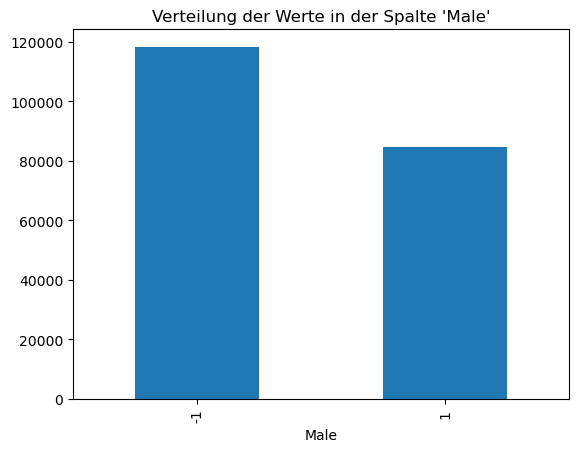

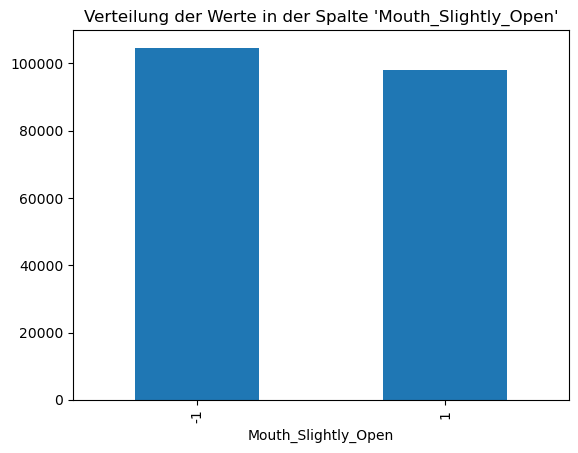

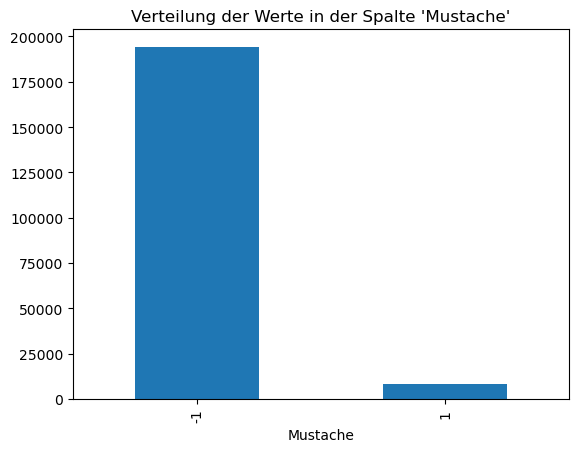

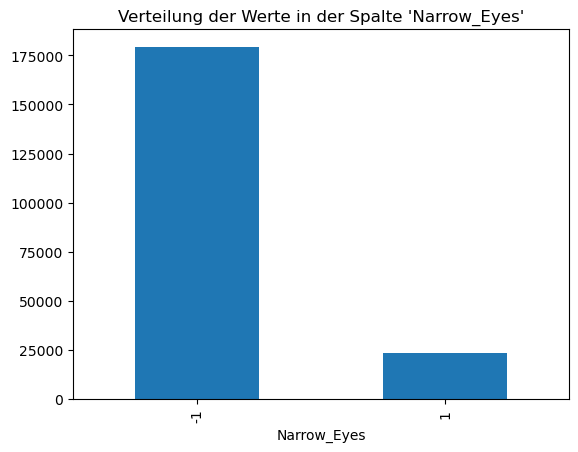

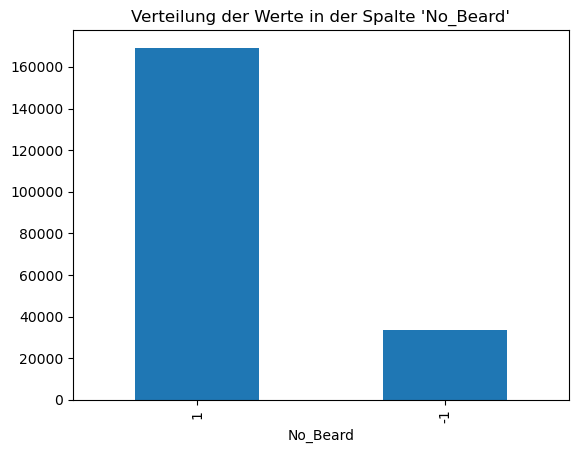

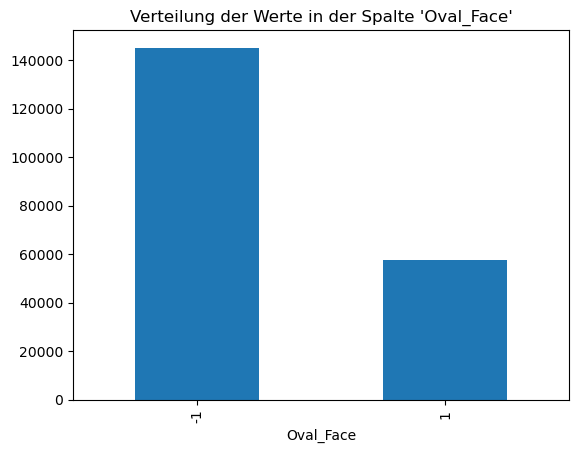

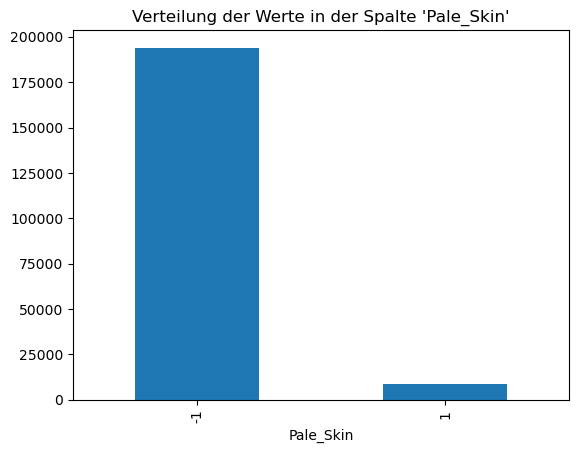

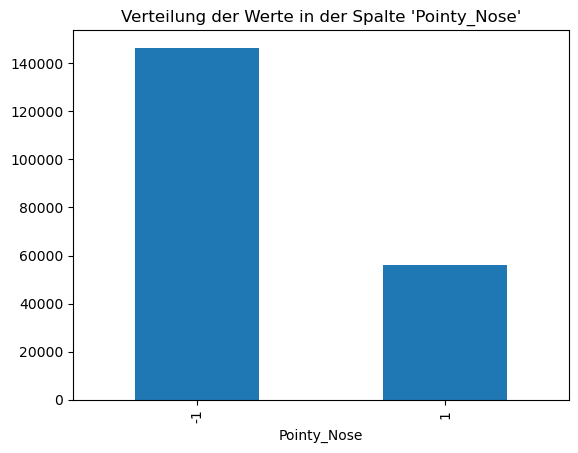

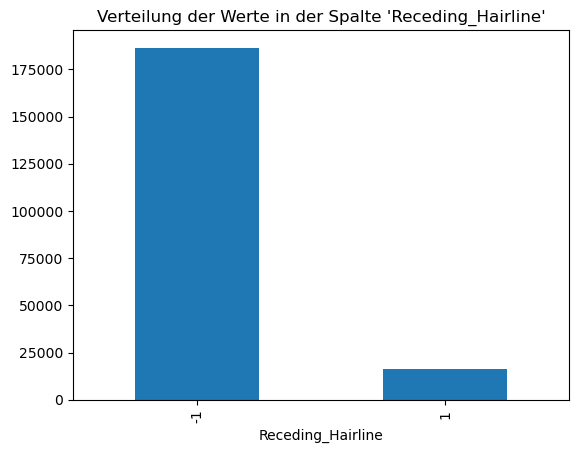

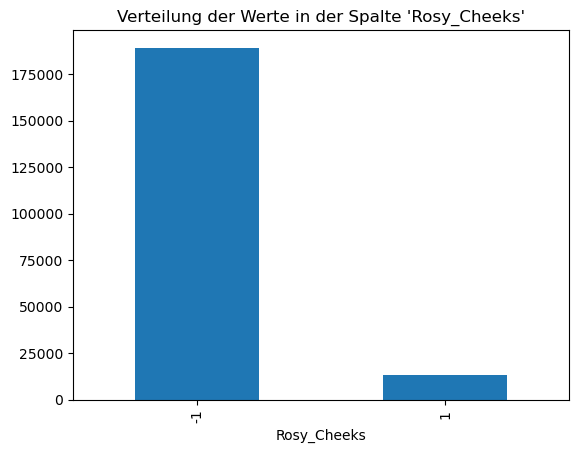

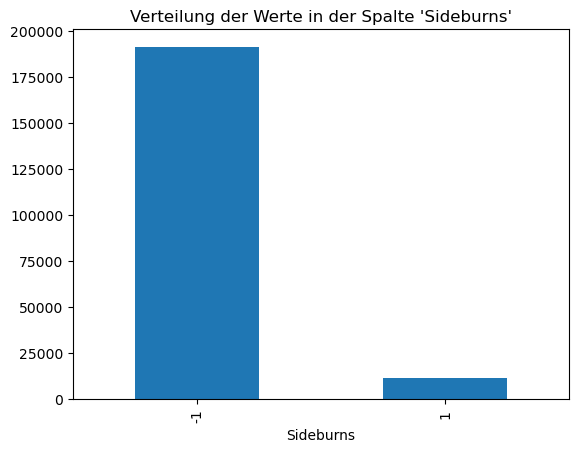

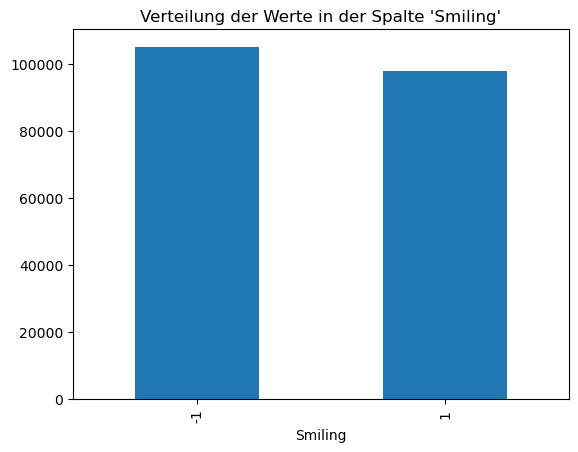

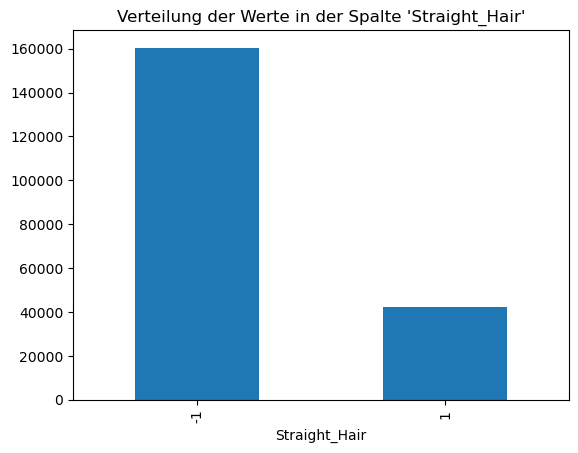

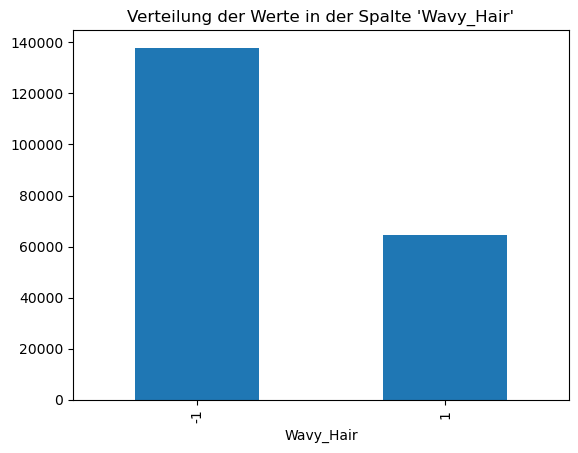

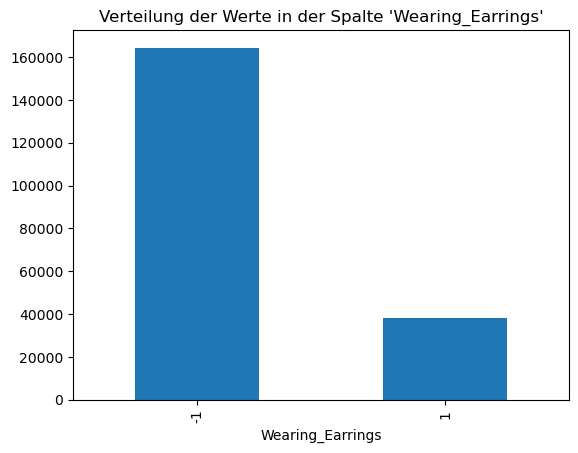

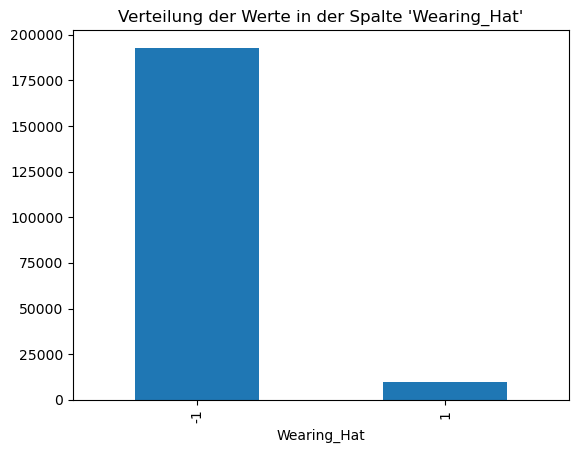

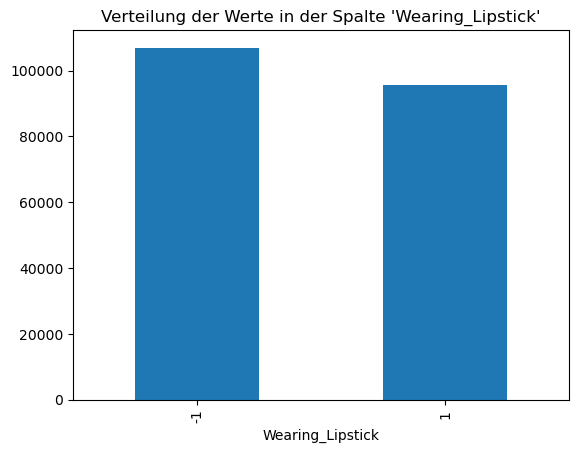

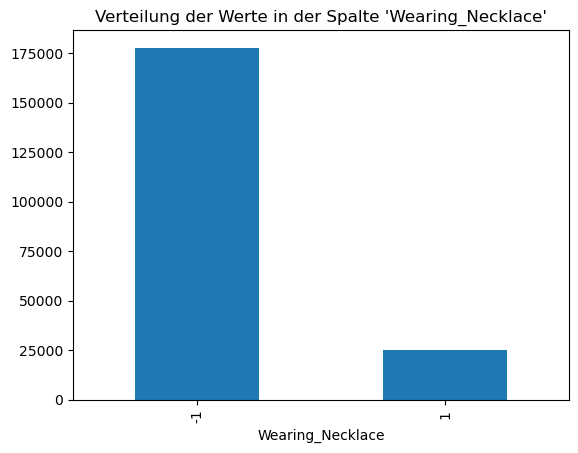

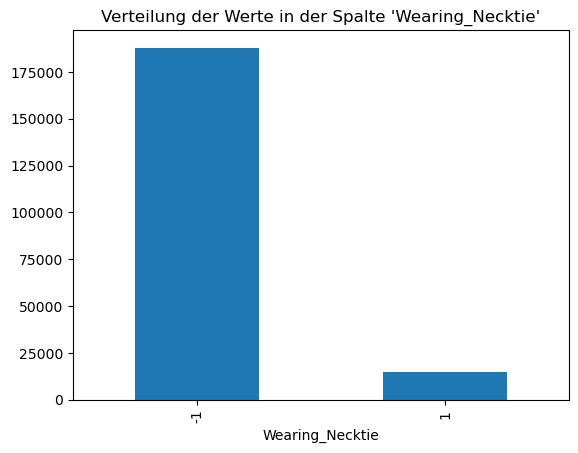

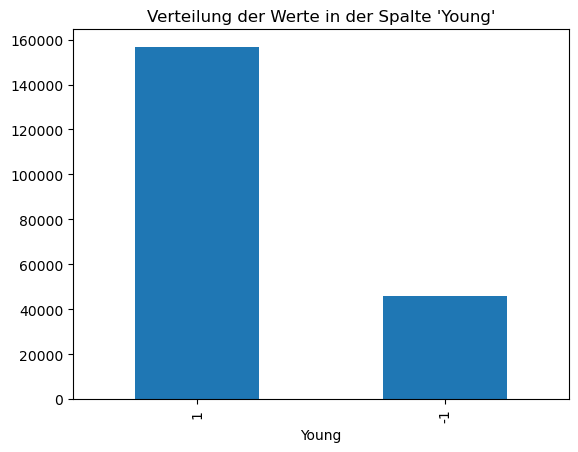

In [322]:
def test_balance_all_columns(csv_path):
    df = pd.read_csv(csv_path)
    imbalance_report = []

    for column_name in df.columns:
        if np.issubdtype(df[column_name].dtype, np.number):  # Überprüfe, ob die Spalte numerisch ist
            counts = df[column_name].value_counts()
            if abs(counts.get(-1, 0) - counts.get(1, 0)) >= 0.1 * len(df):
                imbalance_report.append(f"Die Spalte '{column_name}' ist unausgeglichen. Anzahl von -1: {counts.get(-1, 0)}, Anzahl von 1: {counts.get(1, 0)}")

    if imbalance_report:
        print("Es gibt unausgeglichene Spalten:/n" + "/n".join(imbalance_report))

def is_numeric(column):
    try:
        pd.to_numeric(column)
        return True
    except ValueError:
        return False

# Load your DataFrame
df = pd.read_csv('data/column_source_csv/source.csv')

# Filter the columns to only those with numeric data
numeric_columns = [col for col in df.columns if is_numeric(df[col])]

df = df[numeric_columns]
df.to_csv("../column_source_csv/source.csv", index=False)



def plot_balance_all_columns(csv_path):
    df = pd.read_csv(csv_path)

    for column_name in df.columns:
        if np.issubdtype(df[column_name].dtype, np.number):  # Überprüfe, ob die Spalte numerisch ist
            counts = df[column_name].value_counts()
            counts.plot(kind='bar', title=f"Verteilung der Werte in der Spalte '{column_name}'")
            plt.savefig(f"../plot_data/{column_name}.png")
            plt.show()
            
        
test_balance_all_columns(csv_path=csv_path)
plot_balance_all_columns(csv_path=csv_path)

## 3.5 Datensatz auf Ausreißer überprüfen

In [324]:
def detect_all_outliers(df):
    outliers_percentage = {}
    
    # Gehe durch jede Spalte im DataFrame
    for column_name in df.columns:
        # Überspringe nicht-numerische Spalten
        if pd.api.types.is_numeric_dtype(df[column_name]):
            # Berechne den IQR-Score
            Q1 = df[column_name].quantile(0.25)
            Q3 = df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            # Definiere die Grenzen für Ausreißer
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Finde die Ausreißer
            outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
            
            # Berechne den Prozentsatz der Ausreißer
            outliers_percentage[column_name] = len(outliers) / len(df) * 100
    
    return outliers_percentage


def detect_outliers(df, column_name):
    # Berechne den IQR-Score
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definiere die Grenzen für Ausreißer
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Finde die Ausreißer
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return outliers


df = pd.read_csv(csv_path)
detect_all_outliers(df)

{'5_o_Clock_Shadow': 11.113579040370388,
 'Arched_Eyebrows': 0.0,
 'Attractive': 0.0,
 'Bags_Under_Eyes': 20.457159215988234,
 'Bald': 2.244334868385333,
 'Bangs': 15.157527924619568,
 'Big_Lips': 24.079585782753124,
 'Big_Nose': 23.453225336748947,
 'Black_Hair': 23.925093411122464,
 'Blond_Hair': 14.799184596172735,
 'Blurry': 5.089857304330229,
 'Brown_Hair': 20.519351033321982,
 'Bushy_Eyebrows': 14.216753290983666,
 'Chubby': 5.756691790186526,
 'Double_Chin': 4.668828572697793,
 'Eyeglasses': 6.511878143524894,
 'Goatee': 6.276437692189991,
 'Gray_Hair': 4.1949861549168554,
 'Heavy_Makeup': 0.0,
 'High_Cheekbones': 0.0,
 'Male': 0.0,
 'Mouth_Slightly_Open': 0.0,
 'Mustache': 4.154512115064734,
 'Narrow_Eyes': 11.514864337928618,
 'No_Beard': 16.506004471887817,
 'Oval_Face': 0.0,
 'Pale_Skin': 4.294690496991594,
 'Pointy_Nose': 0.0,
 'Receding_Hairline': 7.977828123534667,
 'Rosy_Cheeks': 6.572095617451221,
 'Sideburns': 5.6510644178895255,
 'Smiling': 0.0,
 'Straight_Hair': 20.8

# 4 Unausgeglichenheit der Daten von ein Paar Datensätzen auflösen um das Verhalten auf das ML-Modell zu beobachten

## 4.1 Anpassen der Unausgeglichenheit zwischen Frauen und Mann Datensätzen

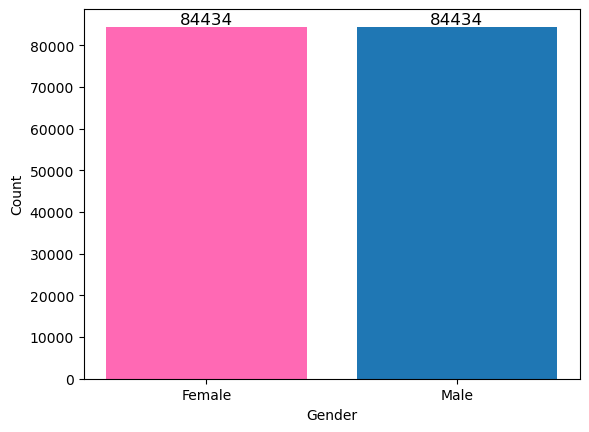

In [325]:
def plot_gender_histogram(df):
    # Zähle die Anzahl von Frauen und Männern
    counts = df['Male'].value_counts()

    # Plotte die Daten
    plt.bar(['Female', 'Male'], [counts[-1], counts[1]], color=['#ff69b4', '#1f77b4'])

    # Schreibe Text auf die Balken
    for i, v in enumerate([counts[-1], counts[1]]):
        plt.text(i, v, str(v), fontsize=12, ha='center', va='bottom')

    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()


def balance_column(csv_path, column_name):
    # Lade die CSV-Datei in einen DataFrame
    df = pd.read_csv(csv_path)

    # Zähle die Anzahl von -1 und 1
    counts = df[column_name].value_counts()

    # Finde den kleineren Wert
    min_count = min(counts.get(-1, 0), counts.get(1, 0))

    # Erstelle einen neuen DataFrame mit einer ausgeglichenen Anzahl von -1 und 1
    df_balanced = pd.concat([
        df[df[column_name] == -1].sample(min_count),
        df[df[column_name] == 1].sample(min_count)
    ], axis=0)

    return df_balanced


# Call the function with your csv file
balanced_df = balance_column(source_csv, "Male")
balanced_df.to_csv("../balanced_source_csv/balanced_gender.csv", index=False)

balanced_csv_path ="../balanced_source_csv/balanced_gender.csv"
plot_gender_histogram(balanced_df)


## 4.2 Unausgeglichenheit zwischen Jungen und Alten Personendatensätzen ausgleichen

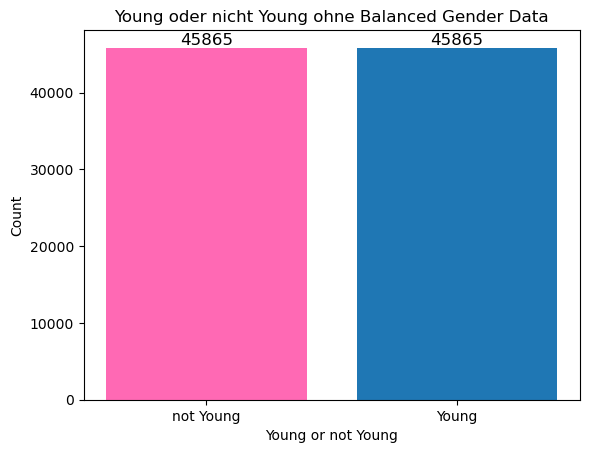

In [326]:
def plot_young_histogram(df):
    # Zähle die Anzahl von Frauen und Männern
    counts = df["Young"].value_counts()

    # Plotte die Daten
    plt.bar(['not Young', 'Young'], [counts[-1], counts[1]], color=['#ff69b4', '#1f77b4'])

    # Schreibe Text auf die Balken
    for i, v in enumerate([counts[-1], counts[1]]):
        plt.text(i, v, str(v), fontsize=12, ha='center', va='bottom')
    plt.title('Young oder nicht Young ohne Balanced Gender Data')
    plt.xlabel('Young or not Young')
    plt.ylabel('Count')
    plt.show()

young_balanced_csv = "data/balanced_source_csv/balanced_young.csv"
df_young_balanced = balance_column(source_csv, "Young")
df_young_balanced.to_csv("data/balanced_source_csv/balanced_young.csv", index=False)
df_young_balanced = pd.read_csv(young_balanced_csv)

plot_young_histogram(df_young_balanced)



# 5. Datenverteilung Testen

## 5.1 Daten auf Normalverteilung testen

In [327]:
from scipy.stats import shapiro
from scipy.stats import kstest, uniform
import pandas as pd


def test_normal_distribution(data, column_name):
    # Führe den Shapiro-Wilk-Test durch
    stat, p = shapiro(data)

    # Überprüfe das Ergebnis
    if p > 0.05:
        result = f'::warning::Die Daten in der Spalte {column_name} folgen wahrscheinlich einer Normalverteilung.'
    else:
        result = f'::warning::Die Daten in der Spalte {column_name} folgen wahrscheinlich nicht einer Normalverteilung.'

    with open("data/reports_data/norm_distribution.txt", "w") as f:
        f.write(result + "\n")

# Call the function with your data
for column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]):
        test_normal_distribution(df[column_name], column_name)





c:\Users\busse\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 5.2 Daten auf Uniformverteilung/Gleichverteilung testen

In [328]:
def test_uniform_distribution(data, column_name):
    # Generiere theoretische Werte für die Uniformverteilung
    theoretical_values = uniform.rvs(size=len(data))

    # Führe den KS-Test durch
    stat, p = kstest(data, theoretical_values)

    # Überprüfe das Ergebnis
    if p > 0.05:
        result = f'::warning::Die Daten in der Spalte {column_name} folgen wahrscheinlich einer Uniformverteilung.'
    else:
        result = f'::warning::Die Daten in der Spalte {column_name} wahrscheinlich nicht einer Uniformverteilung.'

    with open("../reports_data/uniform_distribution.txt", "w") as f:
        f.write(result)

# Call the function with your data
for column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]):
        test_uniform_distribution(df[column_name], column_name)

## 5.3 Daten auf Binomialverteilung testen

In [316]:
import pandas as pd

def test_bernoulli_distribution(data, column_name, p):
    data = data.replace(-1, 0) 
    value_counts = data.value_counts() 
    observed_values = [value_counts.get(1, 0), value_counts.get(0, 0)]
    n = len(data)

    # Berechne die erwarteten Werte
    expected_values = [n*p, n*(1-p)]

    # Überprüfe, ob die beobachteten Werte den erwarteten Werten entsprechen
    if abs(observed_values[0] - expected_values[0]) / n < 0.05 and abs(observed_values[1] - expected_values[1]) / n < 0.05:
        result = f'Die Daten in der Spalte {column_name} folgen wahrscheinlich einer Binomial-Verteilung.'
    else:
        result = f'Die Daten in der Spalte {column_name} folgen wahrscheinlich nicht einer Binomial-Verteilung.'

    with open("data/reports_data/binomial_distribution.txt", "w") as f:
        f.write(result)

for column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]):
        test_bernoulli_distribution(df[column_name], column_name, p=0.5)

## 5.4 Daten auf Exponentialverteilung testen

In [317]:
from scipy.stats import kstest

def test_exponential_distribution(data, column_name):
    stat, p_value = kstest(data, 'expon')
    if p_value > 0.05:
        result = f'Die Daten in der Spalte {column_name} folgen wahrscheinlich einer Exponentialverteilung.'
    else:
        result = f'Die Daten in der Spalte {column_name} folgen wahrscheinlich nicht einer Exponentialverteilung.'

    with open("data/reports_data/exponential_distribution.txt", "w") as f:
        f.write(result)

for column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]):  
        # Entfernen Sie nicht-numerische Werte
        data = df[column_name].dropna()
        test_exponential_distribution(data, column_name)

# 6. Hier werden die Daten nun visualisiert. Dabei werden Datenvielfalt, Datenverteilung visualisiert. 

In [318]:
def detect_outliers_iqr_all_columns(csv_path):
    df = pd.read_csv(csv_path)
    outliers_report = []

    for column_name in df.columns:
        if np.issubdtype(df[column_name].dtype, np.number):  # Überprüfe, ob die Spalte numerisch ist
            Q1 = df[column_name].quantile(0.25)
            Q3 = df[column_name].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[column_name] < Q1 - 1.5 * IQR) | (df[column_name] > Q3 + 1.5 * IQR)]
            if not outliers.empty:
                outliers_report.append(f"Die Spalte '{column_name}' hat Ausreißer. Anzahl: {len(outliers)}")

    return "/n".join(outliers_report)

detect_outliers_iqr_all_columns(csv_path=csv_path)

"Die Spalte '5_o_Clock_Shadow' hat Ausreißer. Anzahl: 22516/nDie Spalte 'Bags_Under_Eyes' hat Ausreißer. Anzahl: 41446/nDie Spalte 'Bald' hat Ausreißer. Anzahl: 4547/nDie Spalte 'Bangs' hat Ausreißer. Anzahl: 30709/nDie Spalte 'Big_Lips' hat Ausreißer. Anzahl: 48785/nDie Spalte 'Big_Nose' hat Ausreißer. Anzahl: 47516/nDie Spalte 'Black_Hair' hat Ausreißer. Anzahl: 48472/nDie Spalte 'Blond_Hair' hat Ausreißer. Anzahl: 29983/nDie Spalte 'Blurry' hat Ausreißer. Anzahl: 10312/nDie Spalte 'Brown_Hair' hat Ausreißer. Anzahl: 41572/nDie Spalte 'Bushy_Eyebrows' hat Ausreißer. Anzahl: 28803/nDie Spalte 'Chubby' hat Ausreißer. Anzahl: 11663/nDie Spalte 'Double_Chin' hat Ausreißer. Anzahl: 9459/nDie Spalte 'Eyeglasses' hat Ausreißer. Anzahl: 13193/nDie Spalte 'Goatee' hat Ausreißer. Anzahl: 12716/nDie Spalte 'Gray_Hair' hat Ausreißer. Anzahl: 8499/nDie Spalte 'Mustache' hat Ausreißer. Anzahl: 8417/nDie Spalte 'Narrow_Eyes' hat Ausreißer. Anzahl: 23329/nDie Spalte 'No_Beard' hat Ausreißer. Anzahl:

In [319]:
def check_duplicates(csv_path):
    df = pd.read_csv(csv_path)
    duplicates = df.duplicated()
    if duplicates.any():
        print(f"Es gibt {duplicates.sum()} Duplikate in den Daten.")
    else:
        print("Es gibt keine Duplikate in den Daten.")

check_duplicates(csv_path=csv_path)

Es gibt keine Duplikate in den Daten.


In [320]:
def check_null_values(csv_path):
    df = pd.read_csv(csv_path)
    null_values = df.isnull().sum()
    if null_values.any():
        print(f"Es gibt Nullwerte in den Daten:\n{null_values}")
    else:
        print("Es gibt keine Nullwerte in den Daten.")

check_null_values(csv_path=csv_path)

Es gibt keine Nullwerte in den Daten.
